### **공통 라이브러리 및 드라이브 연동**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt 
import math
import cv2
impath = '/content/drive/My Drive/Colab Notebooks/Image_processing/image/house.bmp'
impath2 = '/content/drive/My Drive/Colab Notebooks/Image_processing/image/house_grey.bmp'

Mounted at /content/drive


### **1번 Design a function to compute Euclidean and Mahalanobis distance for all data**



> Data 생성



In [ ]:
data = np.array([[170,172,167,180,188,162],[50.5,71.1,61.3,88.4,69.8,58.2],[29,33,37,44,46,35],[80,93,72,88,85,69]])
print(data)

[[170.  172.  167.  180.  188.  162. ]
 [ 50.5  71.1  61.3  88.4  69.8  58.2]
 [ 29.   33.   37.   44.   46.   35. ]
 [ 80.   93.   72.   88.   85.   69. ]]




> Average



In [ ]:
def Average(data):
    average = np.zeros(4)
    average[:] = np.mean(data[0,:]),np.mean(data[1,:]),np.mean(data[2,:]),np.mean(data[3,:])
    return average
average = Average(data)
print(average)

[173.16666667  66.55        37.33333333  81.16666667]




> Euclidean Distance



In [ ]:
def Euclidean(data,average):
    row,col = data.shape
    euclidean = np.zeros(col)
    for i in range(col):
        amu = np.sqrt(np.sum((data[:,i] - average)**2))
        euclidean[i] = amu
    return euclidean
euclidean = Euclidean(data,average)
print(euclidean)

[18.3966256  13.44876079 12.23638699 24.8043511  17.89960428 18.65178722]




> Mahalanobis



In [ ]:
def Mahalanobis(data,average):
    cov = np.cov(data)
    inverse_cov = np.linalg.inv(cov)
    row,col = data.shape
    mahalanobis = np.zeros(col)
    amuT = np.zeros((row,1))
    for i in range(col):
        amu = data[:,i]-average
        amuT[:,0] = amu.transpose()
        mahalanobis[i] = np.sqrt(amu @ inverse_cov @ amuT)
    return mahalanobis
mahalanobis = Mahalanobis(data,average)
print(mahalanobis)

[2.03580358 2.03592286 1.04609029 2.03137388 2.03050146 1.53844108]


### **2번 For the detected corners by Harris method, find the major orientation of corners**



> Harris Corner Detector



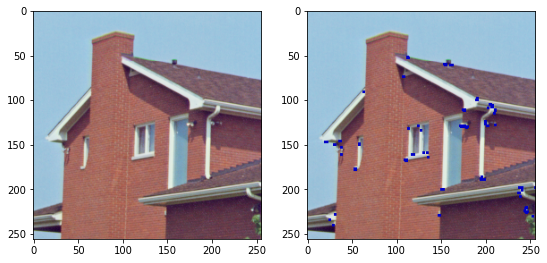

In [5]:
def conv(image,mask):
    col,row = image.shape
    image = np.pad(image,1,'reflect')
    conv = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            conv[i][j] =  np.sum(image[i:i+3,j:j+3]*mask)
    return conv

def Harris(image):
    col,row = image.shape
    mx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    my = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    G = np.random.normal(0,25,3*3) 
    G = G.reshape(3,3)/np.sum(G)
    dx,dy = conv(image,mx),conv(image,my) #convolution
    a0,a1,a2 = conv(dx**2,G),conv(dx*dy,G),conv(dy**2,G)
    A = np.array([[a0, a1],[a1,a2]]) # 행렬 A
    c = np.zeros((col,row))
    k = 0.04
    for i in range(col):
        for j in range(row):
            p,q,r = A[0,0,i,j],A[1,1,i,j],A[0,1,i,j]
            det = (p*q)-(r*r) #det(A)
            trace = p+q #trace(A)
            c[i][j] = det - (k * (trace**2)) #Corner map
    c = cv2.dilate(c,None) #Corner 표시가 더 잘보이게 하기 위해 팽창
    return c

image = cv2.imread(impath) #image read
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,16))
plt.subplot(1,2,1)
plt.imshow(image)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
harris = Harris(imgray)
harris = np.where(harris > harris.max() * 0.02,1,0)
image[harris == 1] = [0,0,200]
plt.subplot(1,2,2)
plt.imshow(image)



> Sobel gradient



In [6]:
def sobel_gradient_dx(image):
    mx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])   #sobel filter dx
    col, row = image.shape
    image = np.pad(image,1 ,'reflect')  #convolution을 위해 image padding
    dx = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dx[i][j] = np.sum(image[i:i+3,j:j+3]*mx) #convolution
    return dx

def sobel_gradient_dy(image):
    my = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]) #sobel filter dy
    col, row = image.shape
    image = np.pad(image,1,'reflect')  #convolution을 위해 image padding
    dy = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dy[i][j] = np.sum(image[i:i+3,j:j+3]*my)   #convolution
    return dy



> Local Orientation (1개)



51 111
[[   0.          180.            0.            0.            0.        ]
 [  90.         -167.3474435   -43.19126068  -53.63908971  -90.        ]
 [  90.          176.08175114 -109.82246457  -75.76271953  -90.        ]
 [ -90.         -179.118596    179.70002484    0.            0.        ]
 [   0.          180.          180.            0.            0.        ]]
[[   0.          180.            0.            0.            0.        ]
 [  90.         -167.3474435   -43.19126068  -53.63908971  -90.        ]
 [  90.          176.08175114 -109.82246457  -75.76271953  -90.        ]
 [ -90.         -179.118596    179.70002484    0.            0.        ]
 [   0.          180.          180.            0.            0.        ]]


(array([[0., 0., 0., 1., 0., 0., 2., 0., 0., 2., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 2.],
        [0., 0., 0., 1., 1., 0., 3., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 0.]]),
 array([-180, -150, -120,  -90,  -60,  -30,    0,   30,   60,   90,  120,
         150,  180]),
 <a list of 5 Lists of Patches objects>)

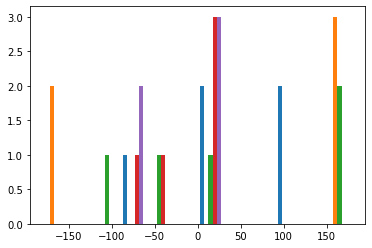

In [7]:
def local_orientation(image,corner_map):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    row, col = corner_map.shape
    theta = np.zeros((row,col,5,5))
    breaker = False
    for i in range(row):
        for j in range(col):
            if (corner_map[i,j] == 1):
                print(i,j)
                if (i-2 >= 0 and j-2 >= 0 and i+3 <= 255 and j+3 <= 255 ):
                    dx = sobel_gradient_dx(imgray[i-2:i+3,j-2:j+3])
                    dy = sobel_gradient_dy(imgray[i-2:i+3,j-2:j+3])
                    arc = np.degrees(np.arctan2(dy,dx))
                    breaker = True
                    break
            if (breaker):
                break
    print(arc)
    return arc
ori = local_orientation(image,harris)
print(ori)
plt.hist(ori,bins=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180])



> Local Orientation (모든 특징점)



In [ ]:
def local_orientation(image,corner_map):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    row, col = corner_map.shape
    theta = np.zeros((row,col,5,5))
    for i in range(row):
        for j in range(col):
            if (corner_map[i,j] == 1):
                if (i-2 >= 0 and j-2 >= 0 and i+3 <= 255 and j+3 <= 255 ):
                    dx = sobel_gradient_dx(imgray[i-2:i+3,j-2:j+3])
                    dy = sobel_gradient_dy(imgray[i-2:i+3,j-2:j+3])
                    arc = np.arctan2(dy,dx)
                    theta[i,j,:,:] = arc
    return theta
ori = local_orientation(image,harris)

In [ ]:
image = cv2.imread(impath) #image read
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def dy_image(image):
  y_image = np.pad(image, ((1,1),(0, 0)), mode='edge')
  y_mask = np.array([[-1],[0],[1]])
  h_f,w_f = y_mask.shape
  h,w = image.shape
  output = np.zeros((h,w))
  tmp = np.zeros((h_f,w_f))
  for i in range(h):
    for j in range(w):
      tmp = y_image[i:i+h_f,j:j+w_f]
      output[i][j] = np.sum(tmp*y_mask)
  
  return output

def dx_image(image):
  x_image = np.pad(image, ((0,0),(1, 1)), mode='edge')
  x_mask = np.array([[-1,0,1]])
  h_f,w_f = x_mask.shape
  h,w = image.shape
  output = np.zeros((h,w))
  tmp = np.zeros((h_f,w_f))
  for i in range(h):
    for j in range(w):
      tmp = x_image[i:i+h_f,j:j+w_f]
      output[i][j] = np.sum(tmp*x_mask)
  
  return output

[-180. -170. -160. -150. -140. -130. -120. -110. -100.  -90.  -80.  -70.
  -60.  -50.  -40.  -30.  -20.  -10.    0.   10.   20.   30.   40.   50.
   60.   70.   80.   90.  100.  110.  120.  130.  140.  150.  160.  170.
  180.]
[[-90.         -45.         -90.         180.          90.        ]
 [-86.42366563 -82.56859203 -83.65980825 -63.43494882 -45.        ]
 [-82.56859203 -69.44395478 -55.0079798  -15.9453959  -63.43494882]
 [-83.11827637 -56.72511202 -26.20011484   0.           0.        ]
 [-80.53767779 -23.33404128  -6.04409216   0.           0.        ]]
692.9011907610363
691.9011907610362
[[ 3.          1.41421356  1.          1.          1.        ]
 [32.06243908 23.19482701  9.05538514  2.23606798  1.41421356]
 [69.58448103 68.35202996 36.61966685  7.28010989  2.23606798]
 [58.42088668 76.55063684 70.21395873 29.          1.        ]
 [18.24828759 55.54277631 85.47514259 38.          1.        ]]
[  0.           0.           0.           0.           0.
   0.           0.    

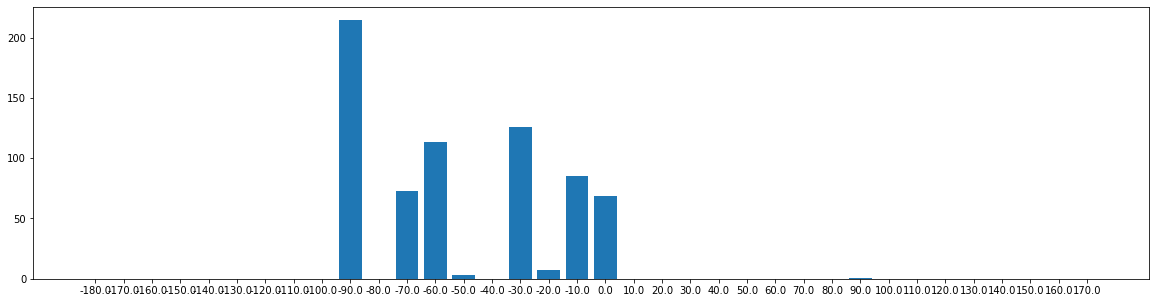

In [ ]:
def orientation_test(image,corner): #첫번째 코너 포인트에서 히스토그램 출력
  h,w = image.shape
  E = np.zeros(37)
  hist = np.zeros(36)
  output = np.zeros((h,w))
  breaker = False
  for i in range(37):
    E[i] = -180 + 10*i
  print(E)
  for i in range(h):
      for j in range(w):
          if (corner[i,j] == 1 and i-2 >= 0 and j-2 >= 0 and i+3 <= 255 and j+3 <= 255):
              dy = dy_image(image[i-2:i+3,j-2:j+3])
              dx = dx_image(image[i-2:i+3,j-2:j+3])
              edge_mag = np.sqrt((dx**2)+(dy**2))
              edge_dir = np.degrees(np.arctan2(dy,dx))
              breaker = True
      if (breaker) :
          break
  for m in range(5):
        for n in range(5):
            for k in range(36):
                if (edge_dir[m,n] >= E[k] and edge_dir[m,n] < E[k+1]):
                    hist[k] += edge_mag[m][n]


  return E, edge_dir, edge_mag, hist

E, orientation_test_dir, orientation_test_mag, orientation_test_hist = orientation_test(imgray,harris)

print(orientation_test_dir)
print(orientation_test_mag.sum())
print(orientation_test_hist.sum())
print(orientation_test_mag)
print(orientation_test_hist)

x = np.arange(36)
plt.figure(figsize=(20,5))
plt.bar(x, orientation_test_hist, width=0.8)
plt.xticks(x, E)
plt.show()

In [ ]:
A = np.array([[10,23,33,41,56],[53,42,30,21,16]])
hist = np.zeros(36)
 for i in range(37):
    E[i] = -180 + 10*i
B = np.array([[5,4,3,6,7],[15,2,3,22,1])
